In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [42]:
import pandas as pd
df = pd.read_csv(r'C:/Users/kater/Documents/Data Science/Курсовой проект/read.csv')

In [43]:
df = df.replace(-9999, np.nan)

In [44]:
df.head()

,Id,X,Y,read_csv
0,1,100,60,NaN
1,2,150,35,NaN
2,3,200,20,NaN
3,4,250,20,NaN
4,5,310,15,NaN


### 
Производим подсчет пустых строк.

In [45]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 5
Rows without NAN: 0


In [46]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Id          0
X           0
Y           0
read_csv    5
dtype: int64

In [47]:
del df['read_csv']

<AxesSubplot:>

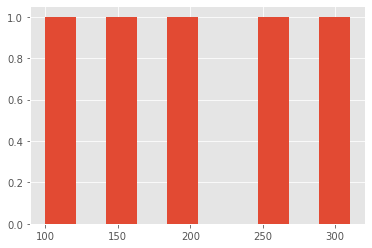

In [48]:
df['X'].hist()

<AxesSubplot:>

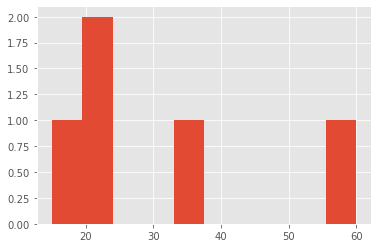

In [49]:
df['Y'].hist()

In [50]:
df['X'] = df['X'].fillna(df['X'].mean())

In [51]:
df['Y'] = df['Y'].fillna(df['Y'].mean())

In [52]:
len(df.dropna())

5

In [54]:
from sklearn.linear_model import LinearRegression

In [63]:
X = df.drop('X', axis=1)
y = df['X']

In [71]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [73]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.9990600241708071


In [74]:
#coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
#coef

,predictor,coef
0,intercept,31.090909
1,Id,54.545455
2,Y,0.242424


In [75]:
#from scipy import stats

#def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,31.090909,0.057754
1,Id,54.545455,0.000014
2,Y,0.242424,0.260575


In [76]:
#df.corr()

,Id,X,Y
Id,1.000000,0.999261,-0.903696
X,0.999261,1.000000,-0.893105
Y,-0.903696,-0.893105,1.000000


In [ ]:
### 
По моему мнению коэффициент линейной регрессии вывел. Далее не вижу смысла делать предсказание по коду.